In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/foreign-direct-investment-data/FDI data.csv')

In [3]:
df.head(5)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


In [4]:
df.columns

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

In [5]:
df.shape

(63, 18)

In [6]:
df.isnull().sum()

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64

In [7]:
# Sum FDI across sectors for each year
df['Total FDI'] = df.iloc[:, 1:].sum(axis=1)

In [8]:
df.head()

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,Total FDI
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18,10330.54
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75,2271.83
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98,11589.13
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57,5181.49
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00,27.74


In [9]:
# Calculate total FDI for each sector across the years
sector_totals = df.groupby('Sector').sum().drop('Total FDI', axis=1)

# Identify sectors with the highest and lowest FDI inflows
highest_fdi_sector = sector_totals.sum(axis=1).idxmax()
lowest_fdi_sector = sector_totals.sum(axis=1).idxmin()

print("Sector with the highest FDI inflow:", highest_fdi_sector)
print("Sector with the lowest FDI inflow:", lowest_fdi_sector)

Sector with the highest FDI inflow: SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)
Sector with the lowest FDI inflow: COIR


In [10]:
sector_totals.head()

,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
Sector,,,,,,,,,,,,,,,,,
AGRICULTURAL MACHINERY,3.64,1.04,13.48,47.54,0.00,92.71,25.19,6.72,5.57,1.88,0.49,2.77,95.41,48.78,72.35,16.44,15.19
AGRICULTURE SERVICES,17.52,14.06,11.01,0.59,3.83,9.08,12.53,58.13,5.35,1222.22,43.90,49.02,161.47,91.01,59.95,84.65,76.43
AIR TRANSPORT (INCLUDING AIR FREIGHT),0.00,0.00,3.80,0.94,4.11,10.27,62.29,99.08,61.37,23.71,136.60,31.22,15.89,45.95,74.56,361.25,83.40
AUTOMOBILE INDUSTRY,195.33,235.76,419.96,119.09,121.97,139.93,260.72,656.10,1150.03,1236.29,1299.41,922.99,1537.28,1517.28,2725.64,2526.82,1609.32
BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,0.04,0.54,0.00,3.31,1.51,0.00,3.96,0.63,31.79,20.05,0.17,1.33,77.91,53.91


<Figure size 1000x600 with 0 Axes>

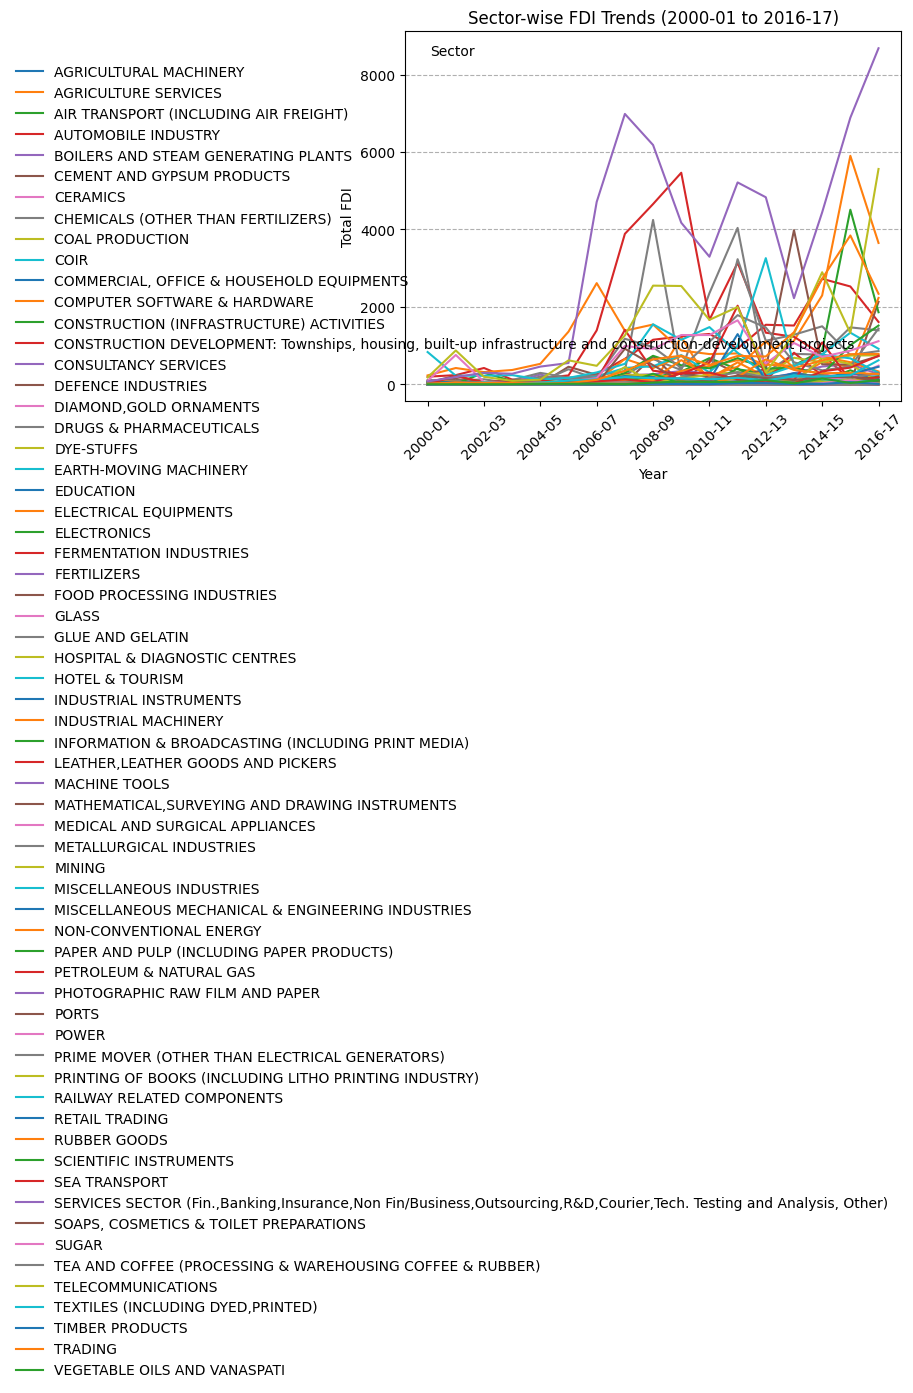

In [11]:
plt.figure(figsize=(10, 6))
sector_totals.T.plot(kind='line')
plt.title('Sector-wise FDI Trends (2000-01 to 2016-17)')
plt.xlabel('Year')
plt.ylabel('Total FDI')
leg = plt.legend(title='Sector')
leg.get_frame().set_alpha(0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

In [12]:
# Calculate total FDI for each year across all sectors
yearly_totals = df.drop(['Sector', 'Total FDI'], axis=1).sum()

# Identify years with significant increases or decreases in FDI
yearly_changes = yearly_totals.pct_change()

significant_increase_years = yearly_changes[yearly_changes > 0.1].index
significant_decrease_years = yearly_changes[yearly_changes < -0.1].index

print("Years with significant increase in FDI (> 10%):", significant_increase_years)
print("Years with significant decrease in FDI (< -10%):", significant_decrease_years)

Years with significant increase in FDI (> 10%): Index(['2001-02', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09',
       '2011-12', '2014-15', '2015-16'],
      dtype='object')
Years with significant decrease in FDI (< -10%): Index(['2002-03', '2003-04', '2009-10', '2010-11', '2012-13'], dtype='object')


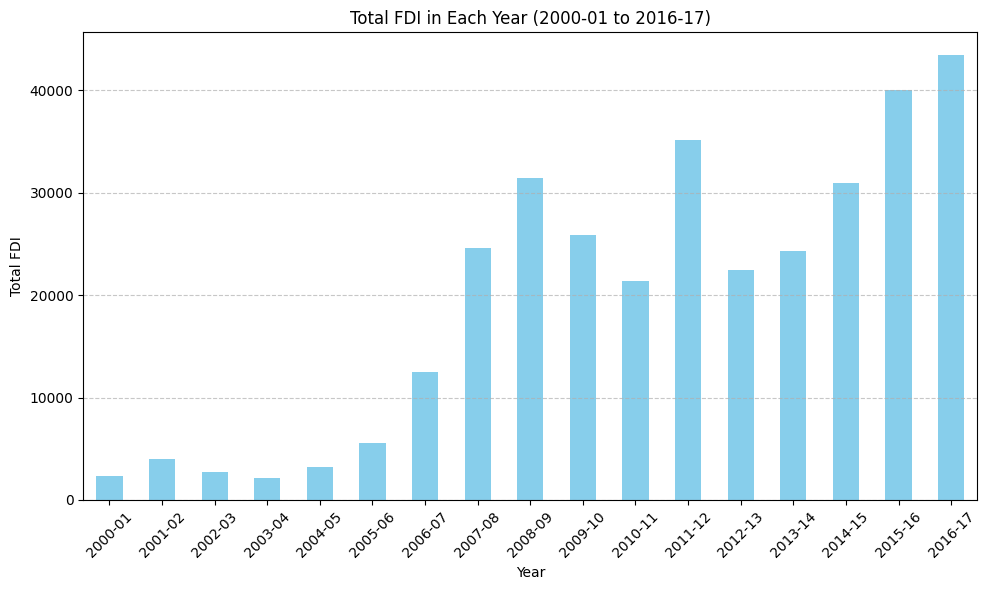

In [13]:
# Create a bar chart for total FDI in each year
plt.figure(figsize=(10, 6))
yearly_totals.plot(kind='bar', color='skyblue')
plt.title('Total FDI in Each Year (2000-01 to 2016-17)')
plt.xlabel('Year')
plt.ylabel('Total FDI')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()